In [1]:
from __future__ import division, absolute_import

import os
import sys
import random

import numpy as np

#root
absPath = '/home/angela/padding_EBI/'
sys.path.insert(0, absPath)

#from src.Target import Target

np.random.seed(8)
random.seed(8)

from src.preprocessing import *
from src.model_architecture import *
from src.training_model import *
from src.postprocessing import *
from src.comparing_results import *
#from src.callbacks import *
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Defining parameters

In [2]:
list_paddings = ['post_padding', 'pre_padding', 'mid_padding', 'stretch_padding', 'ext_padding', 
                 'rdm_padding', 'aug_padding']
list_padding_short = ['post_padding', 'pre_padding', 'mid_padding', 'stretch_padding', 'ext_padding', 
                 'rdm_padding']
#hierarchy of folders: annotation/dataset/architecture/n_neurs/task/padding
folder = 'EC_number/archaea/3denses/bio_neurons/'
column = "EC number"

n_folds = 2

# Pre-processing

Max length: (9159, 505)


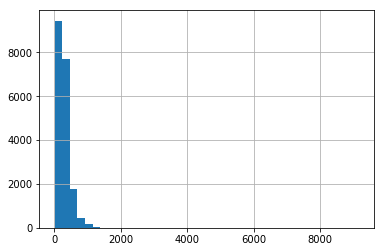

In [3]:
#loading data
file_in= "".join([absPath, 'raw_data/uniprot-reviewed_yes+AND+taxonomy_archaea-EC.tab.gz'])
df = loading_data(file_in, column)
#max len
max_len = looking_max_len(df)
print("Max length:", max_len)
max_lenn = max_len[1]
#filtering
df_filt = filtering_over_maxlen(df, max_lenn)
dicti = creating_dict()

In [4]:
#processing sequences
dicti_padding = {}
for i in list_padding_short:
    dicti_padding[i] = processing_sequences(df_filt, i, max_lenn)

0        MIIGYFDGLCEPKNPGGIATFGFVIYLDNRKIEGYGLAEKPFSINS...
1        MIIEGEVVSGLGEGRYFLSLPPYKEIFKKILGFEPYEGTLNLKLDR...
2        MNINEILKKLINKSDLEINEAEELAKAIIRGEVPEILVSAILVALR...
3        MERAFIEWYPRGYGVAFKIKKKIYEKLSKYQKIEVYETEGFGRLLA...
4        MMMGVELAFPKVVGKQVYGSLYECDEDVLKDTKRLEQIIKEAADIG...
5        MPRLIKDRVPTPERSVGERVRDFGEVNLGYSWELALREAERCLQCP...
6        MGYNEQERAFIEWYPRGYGVGFKVKRRLFETQTEYQRLEIYETEGF...
7        MVDIVKRRDWEKKEKKKIAIERIDTLFTLAERVARYSPDLAKRYVE...
8        MNVEEMKKIAAKEALKFIEDDMVIGLGTGSTTAYFIKLLGEKLKRG...
9        MKKRVVTAGTFDILHPGHYEILKFAKSLGDELIVIVARDETVKKLK...
10       MNNVEKAIEALKKGEIILVYDSDEREGETDMVVASQFITPEHIRIM...
11       MVMVMEKKPYIISNVGMTLDGKLATINNDSRISCEEDLIRVHKIRA...
12       MAVVKEVLEIAEKIKNMEIRGAGKIARSAAYALQLQAEKSKATNVD...
13       MAAFTPQWNDWCPGCGNFGILNAEQQAIVELGVDTKNVVVVSGIGC...
14       MVEKFDTIYDYYVDKGYEPSKKRDIIAVFRVTPAEGYTIEQAAGAV...
15       MAEKFESRGIEEASSEVPTQRRCGAMEVHHRLLRSASYVRERDQIE...
16       MIEEEVLKIIKPTEEDKKGIEKVLEIIRERLNKLDFEVEGSFRKGT.

0        M00I00I00G00Y00F00D00G00L00C00E00P00K00N00P00G...
1        M000I000I000E000G000E000V000V000S000G000L000G0...
2        MN0IN0EI0LK0KL0IN0KS0DL0EI0NE0AE0EL0AK0AI0IR0G...
3        M0E0R0A0F0I0E0W0Y0P0R0G0Y0G0V0A0F0K0I0K0K0K0I0...
4        M000M000M000G000V000E000L000A000F000P000K000V0...
5        MPRLIKDRVPTPERS0VGERVRDFGEVNLGY0SWELALREAERCLQ...
6        M0G0Y0N0E0Q0E0R0A0F0I0E0W0Y0P0R0G0Y0G0V0G0F0K0...
7        M000V000D000I000V000K000R000R000D000W000E000K0...
8        M0N0V0E0E0M0K0K0I0A0A0K0E0A0L0K0F0I0E0D0D0M0V0...
9        M00K00K00R00V00V00T00A00G00T00F00D00I00L00H00P...
10       M0N0N0V0E0K0A0I0E0A0L0K0K0G0E0I0I0L0V0Y0D0S0D0...
11       M0V0M0V0M0E0K0K0P0Y0I0I0S0N0V0G0M0T0L0D0G0K0L0...
12       MA0VV0KE0VL0EI0AE0KI0KN0ME0IR0GA0GK0IA0RS0AA0Y...
13       MA0AF0TP0QW0ND0WC0PG0CG0N0FG0I0LN0A0EQ0Q0AI0V0...
14       MVEKFDT0IYDYYVD0KGYEPSK0KRDIIAV0FRVTPAE0GYTIEQ...
15       MA0EK0FE0SR0GI0EE0AS0SE0VP0TQ0RR0CG0AM0EV0HH0R...
16       MIEE0EVLK0IIKP0TEED0KKGI0EKVL0EIIR0ERLN0KLDF0E.

1.0    9309
0.0    8287
Name: enzyme, dtype: int64
(7,)
Shape of the resulting encoding (17596, 7)
There are  189 samples with more than one label
The unique labels are  ['3', '2', '4', '1', '5', '6', 'nan', '7']


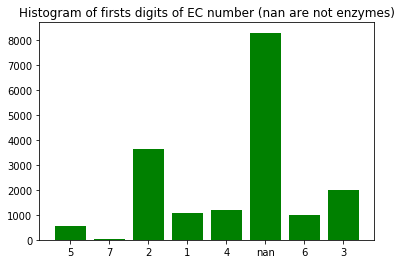

In [5]:
# creating binary enzyme/no enzyme label
df_bin = binarizing_EC(df_filt)

#processing enzyme class label
df_digit1 = first_digit_EC(df_bin)

labels_task1 = bin_to_onehot(df_digit1, 2)

ec_multilabel = encoding_as_multilabel(df_digit1, folder)

data_to_hdf5(folder, 'data.h5', list_padding_short, dicti_padding, labels_task1, ec_multilabel)

counting_multilabel(df_digit1)

In [6]:
#splitting indices
splitting_sets = splitting_sets(0.7, 0.5, dicti_padding['post_padding'], ec_multilabel, folder, kfold_bool=True, n_splits=n_folds)

#creating augmented data
creating_augmented_data(dicti_padding, labels_task1, splitting_sets, folder, 'aug_data.h5', 
                            labels_task2 = ec_multilabel, kfold_bool = True)

# keeping indices enzymes total data
keeping_indices_enzymes(labels_task1, splitting_sets, folder, 'idcs_data_enz.h5', True)

#keeping indices enzymes aug data
file_data = os.path.join(absPath, 'data/', folder, 'aug_data.h5')
h5f = h5py.File(file_data, 'r')
task1_aug = h5f['labels_task1'][:len(h5f['labels_task1'])]


# Loading splitting indices
file_idcs = os.path.join(absPath, 'data/', folder, 'idcs_aug_split.pickle')

with open(file_idcs, "rb") as input_file:
    k_aug_indices = pickle.load(input_file)

keeping_indices_enzymes(labels_task1, splitting_sets, folder, 'idcs_aug_enz.h5', True)

In [ ]:
splitting_sets

In [7]:
#hay que modificar splitting sets 

labels = np.array([0 if list(x) ==[0., 0., 0., 0., 0., 0., 0.] else (x.argmax(-1)+1) for x in list(labels)])

NameError: name 'labels' is not defined

In [ ]:
ec_multilabel

# Defining Deep Learning model  - Task 1

In [ ]:
n_class = 2 #number of classes to output
drop_per = 0.2 #Input dropout 
n_neur = [314,77,8]
drop_hid = 0.5
dict_size = len(dicti)

batch_size = 54
epochss = 200

model = building_3dense_model_task1(max_lenn, dict_size, n_neur, n_class, drop_per, drop_hid, 'softmax', folder)
